# Project Goals

1. How long (miles) do people travel in Uber?
2. Which day has highest number of trips?
3. What are the number of trips each day?
4. What hour do most people take Uber?
5. What is the purpose of the trip?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("UberData.csv")

In [8]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
#Removing '*' from column names
columns=['START_DATE','END_DATE','CATEGORY','START','STOP','MILES','PURPOSE']
data.columns=columns

In [11]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [10]:
data=data[:-1]

# Dealing with Missing Values

In [18]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
data.shape

(1155, 7)

**Handling Missing Values**

- Drop row
- Drop Column
- Estimate Value -> Fill value

In [17]:
data = data.fillna(value='Others')

# Feature Engineering

In [23]:
#Converting string to date-time format

data['START_DATE']=pd.to_datetime(data['START_DATE'])
data['END_DATE']=pd.to_datetime(data['END_DATE'])
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Others
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [27]:
hour=[]
day=[]
month=[]
dayofweek=[]
dayname=[]

for dt in data['START_DATE']:
    hour.append(dt.hour)
    day.append(dt.day)
    month.append(dt.month)
    dayofweek.append(dt.dayofweek)
    dayname.append(dt.day_name())

In [28]:
data['HOUR']=hour
data['DAY']=day
data['MONTH']=month
data['DAYOFWEEK']=dayofweek
data['DAYNAME']=dayname

In [29]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Others,1,2,1,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday


In [30]:
data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,5,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,5,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,5,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,5,Saturday
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,22,31,12,5,Saturday


# Exploratory Data Analysis

<AxesSubplot:>

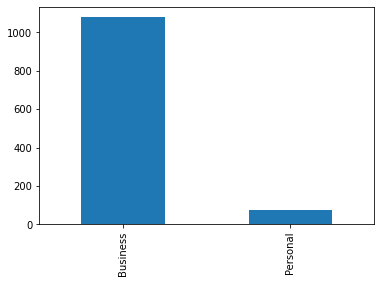

In [41]:
data['CATEGORY'].value_counts().plot(kind='bar')

### How long (miles) do people travel in Uber?

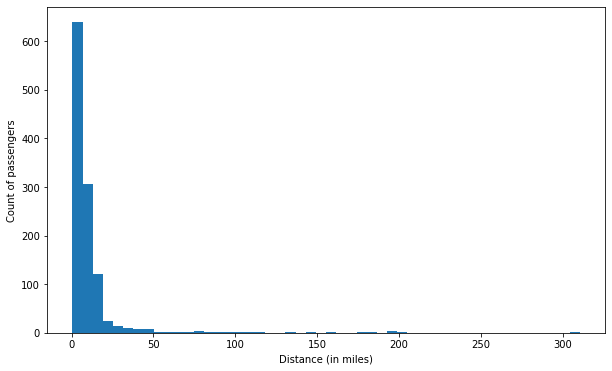

In [37]:
plt.figure(figsize=(10,6))

plt.hist(data['MILES'],bins=50)
plt.xlabel('Distance (in miles)')
plt.ylabel('Count of passengers')
plt.show()

**Observation**

1. People mainly use Uber for short rides

### What hour do most people take Uber?

In [39]:
data['HOUR'].value_counts()

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: HOUR, dtype: int64

<AxesSubplot:>

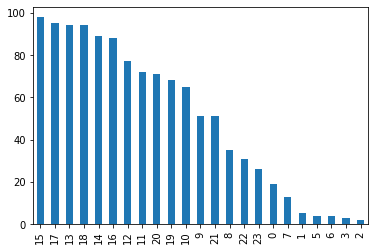

In [40]:
data['HOUR'].value_counts().plot(kind='bar')

C:\Users\Harshvardhan Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOUR', ylabel='count'>

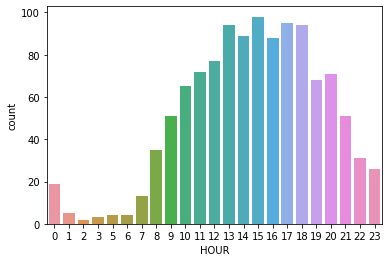

In [42]:
sns.countplot(data['HOUR'])

### What is the purpose of the trip?

In [43]:
data['PURPOSE'].value_counts()

Others             502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

C:\Users\Harshvardhan Agarwal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PURPOSE', ylabel='count'>

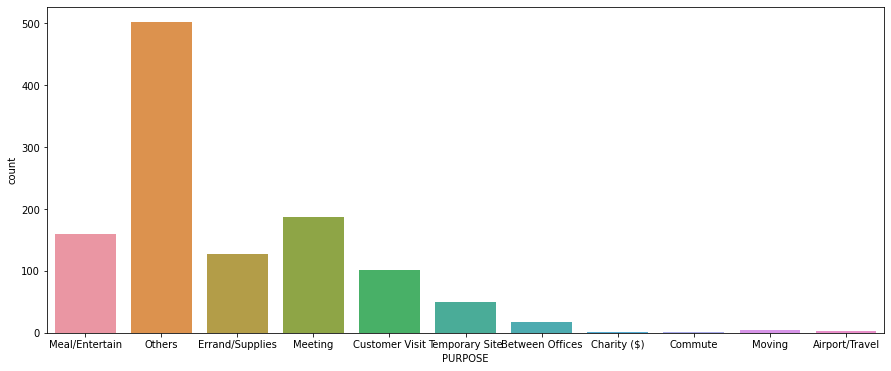

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(data['PURPOSE'])

### DAY

<AxesSubplot:>

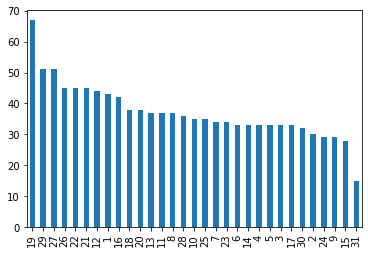

In [48]:
data['DAY'].value_counts().plot(kind='bar')

### MONTH

<AxesSubplot:>

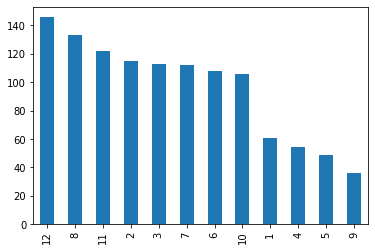

In [49]:
data['MONTH'].value_counts().plot(kind='bar')

In [60]:
(data['END_DATE']-data['START_DATE']).dt.seconds

0        360
1        720
2        780
3        840
4       4020
        ... 
1150     420
1151    1080
1152    2100
1153    1080
1154    6180
Length: 1155, dtype: int64

In [54]:
def convertMinutes(time):
    return time/60

In [62]:
diff=(data['END_DATE']-data['START_DATE']).dt.seconds

In [65]:
data['DURATION_MINS'] = diff.apply(convertMinutes)

In [68]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MINS,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday,6.0,51.000000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Others,1,2,1,5,Saturday,12.0,25.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday,13.0,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday,67.0,57.044776


In [67]:
data['SPEED'] = data['MILES']/(data['DURATION_MINS']/60)

In [72]:
data[data['SPEED']>10000]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,DAYOFWEEK,DAYNAME,DURATION_MINS,SPEED
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Others,17,6,9,1,Tuesday,0.0,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Others,7,16,9,4,Friday,0.0,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,Others,15,8,10,5,Saturday,0.0,inf
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,Others,13,13,10,3,Thursday,0.0,inf
